## Project: Predicting a Tumor is malignant or Benign

### Importing data and seeing the insights:

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
df = load_breast_cancer()

In [3]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

This are all the Feature names or 'X' values

In [4]:
print("This are values of the First row:\n")
for i, j in zip(df.feature_names, df.data[0]):
    print(i, ": ", j)

This are values of the First row:

mean radius :  17.99
mean texture :  10.38
mean perimeter :  122.8
mean area :  1001.0
mean smoothness :  0.1184
mean compactness :  0.2776
mean concavity :  0.3001
mean concave points :  0.1471
mean symmetry :  0.2419
mean fractal dimension :  0.07871
radius error :  1.095
texture error :  0.9053
perimeter error :  8.589
area error :  153.4
smoothness error :  0.006399
compactness error :  0.04904
concavity error :  0.05373
concave points error :  0.01587
symmetry error :  0.03003
fractal dimension error :  0.006193
worst radius :  25.38
worst texture :  17.33
worst perimeter :  184.6
worst area :  2019.0
worst smoothness :  0.1622
worst compactness :  0.6656
worst concavity :  0.7119
worst concave points :  0.2654
worst symmetry :  0.4601
worst fractal dimension :  0.1189


In [5]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

Therefore, in target names 0 means the Tumor is malignant whereas 1 means it is Benign

In [6]:
print('Shape of feature names: ', df.data.shape, '\nShape of Target Names: ', df.target.shape)

Shape of feature names:  (569, 30) 
Shape of Target Names:  (569,)


All the column as Continuous Data and has no Null values

## Data Preprocessing

#### Step 1: Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.data)

#### Step 2: Train Test & Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df.target, test_size=0.2, shuffle=False)

### Making Model with Logistic Regression:

#### Step 1: Fitting Data

In [9]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)

LogisticRegression()

#### Step 2: Prediction

In [10]:
rr = X_train[34].reshape(-1, 1).T # rr means random row
prediction = logit_reg.predict(rr)
pred_probability = logit_reg.predict_proba(rr)
pred_log_proba = logit_reg.predict_log_proba(rr)

print("Prediction: ", prediction)
print("Prediction probability: ", pred_probability)
print("Prediction Log Probability: ", pred_log_proba)

Prediction:  [0]
Prediction probability:  [[9.99139655e-01 8.60345386e-04]]
Prediction Log Probability:  [[-8.60715695e-04 -7.05817664e+00]]


#### Step 3: Prediction on Test Set

In [11]:
y_pred = logit_reg.predict(X_test)

In [12]:
print("Prediction: \n", y_pred)
print("\nActual Values: \n", y_test)

Prediction: 
 [0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]

Actual Values: 
 [1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]


#### Step 4: Visualizing Prediction with Confusion Matrix & Accuracy

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 2 86]]


In [14]:
print("Model Score: ", logit_reg.score(X_test, y_test))

Model Score:  0.9824561403508771


Congratulations! We have achieved accuracy of 98%

Confusion matrix, without normalization
[[26  0]
 [ 2 86]]


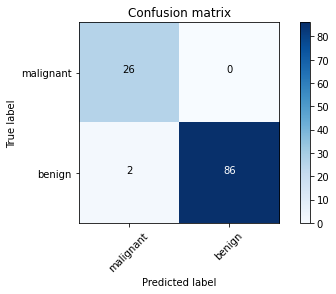

In [15]:
from PCM.PCM import plot_confusion_matrix

plot_confusion_matrix(cm, df.target_names)

Our model has predicted 2 Benign tumor as Malignant tumor and else all correctly!